In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
%pwd

'/Users/trinidadbosch/Desktop/SEDS/Tesis/Data/MA-Thesis/Media Cloud/scripts'

In [4]:
news = pd.read_csv('/Users/trinidad/Desktop/Thesis/MA-Thesis/Media Cloud/Data/scraped_news.csv')
urls = pd.read_pickle('/Users/trinidad/Desktop/Thesis/MA-Thesis/Media Cloud/Data/media_urls.pkl')

In [3]:
news.head()
urls.head()

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
0,False,2021-02-01 11:29:05.575011,NaN,https://news.mongabay.com/2021/02/eye-in-the-s...,en,19317,Mongabay,https://news.mongabay.com/,"{'date_guess_method': None, 'extractor_version...",2248100280,2021-02-01 03:11:18,1838925040,[],Eye in the Sky: Tech makes satellite imagery i...,https://news.mongabay.com/2021/02/eye-in-the-s...,NaN
1,False,2021-02-01 13:30:32.746109,NaN,106833338,en,1755,CNBC,http://www.cnbc.com/,"{'date_guess_method': None, 'extractor_version...",2248130305,2021-02-01 13:28:31,1839017422,[],"Amazon, Alphabet and Salesforce are all invest...",https://www.cnbc.com/2021/02/01/amazon-alphabe...,NaN
2,False,2021-02-01 13:24:21.419836,NaN,19412429 at https://www.benzinga.com,en,22041,Benzinga,http://www.benzinga.com,"{'date_guess_method': None, 'extractor_version...",2248176595,2021-02-01 13:17:36,1839009079,[],15 Big Ideas In 'Disruptive Innovation' Accord...,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,NaN
3,False,2021-02-01 11:22:41.615668,NaN,https://eurweb.com/?p=873530,en,25336,eurweb,http://www.eurweb.com,"{'date_guess_method': None, 'extractor_version...",2248202709,2021-02-01 02:05:19,1838767296,[],Black Creators At Sundance 2021,https://eurweb.com/2021/01/31/black-creators-a...,NaN
4,False,2021-02-01 14:26:32.665619,NaN,19427358 at https://www.benzinga.com,en,22041,Benzinga,http://www.benzinga.com,"{'date_guess_method': None, 'extractor_version...",2248281055,2021-02-01 14:07:26,1839090241,[],Why Bill.com's Stock Is Trading Higher Today,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,NaN


In [30]:
urls.columns

Index(['ap_syndicated', 'collect_date', 'feeds', 'guid', 'language',
       'media_id', 'media_name', 'media_url', 'metadata',
       'processed_stories_id', 'publish_date', 'stories_id', 'story_tags',
       'title', 'url', 'word_count'],
      dtype='object')

In [31]:
# Merge DataFrames on different ID columns
merged_df = pd.merge(news, urls, left_on='ID', right_on='stories_id', how='inner')

In [34]:
merged_df
merged_df['stories_id'].isnull().sum()

0

---
## Looking for sites that blockes scraping
    Body column with Nan means that the scrape was not successful

In [36]:
# Filter rows where 'Body' column contains NaN values
nan_body_rows = merged_df[merged_df['Body'].isna()]
# Filter rows where 'Body' column does not contain NaN values
non_nan_body_rows = merged_df[~merged_df['Body'].isna()]

In [40]:
non_nan_body_rows

,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,...,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
0,2785393041,https://www.centralmaine.com/2023/10/01/u-s-se...,“Deep fakes” that rely on nearly flawless comp...,Susan Collins among backers of a bill eyed for...,"['Steve Collins', 'Email Writer']",2023-10-01 00:00:00,U.S. Senate weighs measure to restrict AI use ...,"{'angus king', 'artificial intelligence', 'sus...",[''],“This bipartisan legislation would help to str...,...,Central Maine News,https://www.centralmaine.com/,"{'date_guess_method': None, 'extractor_version...",3131344363,2023-10-01 00:00:25,2785393041,[],U.S. Senate weighs measure to restrict AI use ...,https://www.centralmaine.com/2023/10/01/u-s-se...,NaN
1,2785393041,https://www.centralmaine.com/2023/10/01/u-s-se...,“Deep fakes” that rely on nearly flawless comp...,Susan Collins among backers of a bill eyed for...,"['Steve Collins', 'Email Writer']",2023-10-01 00:00:00,U.S. Senate weighs measure to restrict AI use ...,"{'angus king', 'artificial intelligence', 'sus...",[''],“This bipartisan legislation would help to str...,...,Central Maine News,https://www.centralmaine.com/,"{'date_guess_method': None, 'extractor_version...",3131344363,2023-10-01 00:00:25,2785393041,[],U.S. Senate weighs measure to restrict AI use ...,https://www.centralmaine.com/2023/10/01/u-s-se...,NaN
2,2785393041,https://www.centralmaine.com/2023/10/01/u-s-se...,“Deep fakes” that rely on nearly flawless comp...,Susan Collins among backers of a bill eyed for...,"['Steve Collins', 'Email Writer']",2023-10-01 00:00:00,U.S. Senate weighs measure to restrict AI use ...,"{'angus king', 'artificial intelligence', 'sus...",[''],“This bipartisan legislation would help to str...,...,Central Maine News,https://www.centralmaine.com/,"{'date_guess_method': None, 'extractor_version...",3131344363,2023-10-01 00:00:25,2785393041,[],U.S. Senate weighs measure to restrict AI use ...,https://www.centralmaine.com/2023/10/01/u-s-se...,NaN
3,2785435424,https://biztoc.com/x/3788c64223fc12c1?ref=ff,Justin Fields is back as the Chicago Bears hos...,The Entire Business World on a Single Page wit...,[],NaN,BizToc,set(),"['News', 'Aggregator', 'Breaking News', 'Curat...",Justin Fields is back as the Chicago Bears hos...,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131380794,2023-10-01 00:50:06,2785435424,[],Nick Clegg says Meta used public Facebook and ...,https://biztoc.com/x/3788c64223fc12c1?ref=ff,NaN
4,2785435424,https://biztoc.com/x/3788c64223fc12c1?ref=ff,The interception — the first of Pace's career ...,The Entire Business World on a Single Page wit...,[],NaN,BizToc,set(),"['News', 'Aggregator', 'Breaking News', 'Curat...",The interception — the first of Pace's career ...,...,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131380794,2023-10-01 00:50:06,2785435424,[],Nick Clegg says Meta used public Facebook and ...,https://biztoc.com/x/3788c64223fc12c1?ref=ff,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10578,2798556103,https://decider.com/2023/10/15/who-replaced-ju...,We’ll cut to the chase — Rick and Morty is ret...,Wondering who replaced Justin Roiland in 'Rick...,[],2023-10-15 00:00:00,Who Replaced Justin Roiland in ‘Rick and Morty...,"{'animation', 'Justin Roiland', 'Dan Harmon', ...","['animation', 'Dan Harmon', 'Harry Belden', 'I...",We’ll cut to the chase — Rick and Morty is ret...,...,New York Post,http://www.nypost.com/,"{'date_guess_method': None, 'extractor_version...",3143152245,2023-10-15 23:13:26,2798556103,[],Who Replaced Justin Roiland in ‘Rick and Morty...,https://decider.com/2023/10/15/who-replaced-ju...,NaN
10579,2798801799,https://www.washingtonpost.com/opinions/2023/1...,Listen 4 min Share Comment on this story Comme...,Much depends on the United States getting its ...,['Editorial Boa

In [48]:
# Check if content of 'Name' column is the same as 'Age' column
nan_body_rows['equal_url'] = nan_body_rows['URL'] == nan_body_rows['url']

/var/folders/40/_xs977_s23jff20ybrgxbmmw0000gn/T/ipykernel_34245/2008722535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_body_rows['equal_url'] = nan_body_rows['URL'] == nan_body_rows['url']


In [49]:
nan_body_rows['equal_url'].value_counts()

equal_url
True    2956
Name: count, dtype: int64

In [41]:
# Drop duplicates based on the 'URL' column in both no scraped and scraped news
df_na_no_duplicates = nan_body_rows.drop_duplicates(subset='URL')

df_no_duplicates = non_nan_body_rows.drop_duplicates(subset='URL')

In [42]:
df_no_duplicates.columns

Index(['ID', 'URL', 'Body', 'MetaData', 'Authors', 'Date', 'Title', 'Tags',
       'MetaKeywords', 'Summary', 'Error', 'ap_syndicated', 'collect_date',
       'feeds', 'guid', 'language', 'media_id', 'media_name', 'media_url',
       'metadata', 'processed_stories_id', 'publish_date', 'stories_id',
       'story_tags', 'title', 'url', 'word_count'],
      dtype='object')

In [43]:
no_scraped = df_na_no_duplicates.drop(columns=['MetaData','Authors', 'Date', 'Title', 'Tags',
       'MetaKeywords', 'Summary','ap_syndicated', 'collect_date',
       'feeds', 'guid', 'language', 'processed_stories_id', 'publish_date','word_count','url'])

scraped = df_no_duplicates.drop(columns=['Error','ap_syndicated', 'collect_date',
       'feeds', 'guid', 'language', 'media_id',
       'metadata', 'processed_stories_id', 'stories_id',
       'story_tags', 'title', 'url', 'word_count'])

In [23]:
scraped

,ID,URL,Body,MetaData,Authors,Date,Title,Tags,MetaKeywords,Summary,media_name,media_url,publish_date
0,1838925040,https://news.mongabay.com/2021/02/eye-in-the-s...,An interdisciplinary team of zoologists and co...,Environmental science and conservation news,['Terna Gyuse'],2021-02-01 08:11:18+00:00,Eye in the Sky: Tech makes satellite imagery i...,"{'Wildlife', 'Animals', 'Jim Tan', 'Endangered...",[''],Satellite surveying still offers many advantag...,NaN,NaN,NaN
1,1839017422,https://www.cnbc.com/2021/02/01/amazon-alphabe...,"Ali Ghodsi, co-founder and CEO of Databricks I...","Amazon is getting involved in the start-up, Da...",['Jordan Novet'],2021-02-01 00:00:00,"Amazon, Alphabet and Salesforce are all invest...",set(),"['Start-up', 'Venture capital', 'Microsoft Cor...","Ali Ghodsi, co-founder and CEO of Databricks I...",NaN,NaN,NaN
2,1839009079,http://feeds.benzinga.com/~r/benzinga/~3/JWduJ...,One of the hottest names in the investing worl...,One of the hottest names in the investing worl...,['Chris Katje'],NaN,15 Big Ideas In 'Disruptive Innovation' Accord...,"{'Government', 'Digital Wallets', 'Healthcare'...",[''],One of the hottest names in the investing worl...,NaN,NaN,NaN
3,1838767296,https://eurweb.com/2021/01/31/black-creators-a...,*It’s day four at the 2021 Sundance Film Festi...,NaN,['Olivia T.'],2021-01-31 00:00:00,Black Creators At Sundance 2021,"{'white wedding', 'sundance', 'Sophia Nahli Al...",[''],*It’s day four at the 2021 Sundance Film Festi...,NaN,NaN,NaN
4,1839090241,http://feeds.benzinga.com/~r/benzinga/~3/y-hmu...,Loading... Loading...\n\nBill.com BILL shares ...,Bill.com (NYSE: BILL) shares are trading highe...,['Tanzeel Akhtar'],NaN,Why Bill.com's Stock Is Trading Higher Today -...,"{'Government', 'Healthcare', 'Politics', 'Regu...",[''],Loading... Loading...Bill.com BILL shares are ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116797,2814615647,https://biztoc.com/x/acdbc1a92129ddc1?ref=ff,With Geno Smith inactive due to a groin injury...,The Entire Business World on a Single Page wit...,[],NaN,BizToc,set(),"['News', 'Aggregator', 'Breaking News', 'Curat...",With Geno Smith inactive due to a groin injury...,Upworthy,http://www.upworthy.com,2023-11-01 11:44:10
116798,2814615262,https://biztoc.com/x/6f7a075f2bd1cf54?ref=ff,With Geno Smith inactive due to a groin injury...,The Entire Business World on a Single Page wit...,[],NaN,BizToc,set(),"['News', 'Aggregator', 'Breaking News', 'Curat...",With Geno Smith inactive due to a groin injury...,Upworthy,http://www.upworthy.com,2023-11-01 11:48:41
116799,2814612859,https://biztoc.com/x/bc72dc673454df4f?ref=ff,With Geno Smith inactive due to a groin injury...,The Entire Business World on a Single Page wit...,[],NaN,BizToc,set(),"['News', 'Aggregator', 'Breaking News', 'Curat...",With Geno Smith inactive due to a groin injury...,Upworthy,http://www.upworthy.com,2023-11-01 12:12:16
116803,2814638940,https://biztoc.com/x/eaab552cedfec9fd?ref=ff,With Geno Smith inactive due to a groin injury...,The Entire Business World on a Single Page wit...,[],NaN,BizToc,set(),"['News', 'Aggregator', 'Breaking News', 'Curat...",With Geno Smith inactive due to a groin injury...,Upworthy,http://www.upworthy.com,2023-11-01 12:36:06


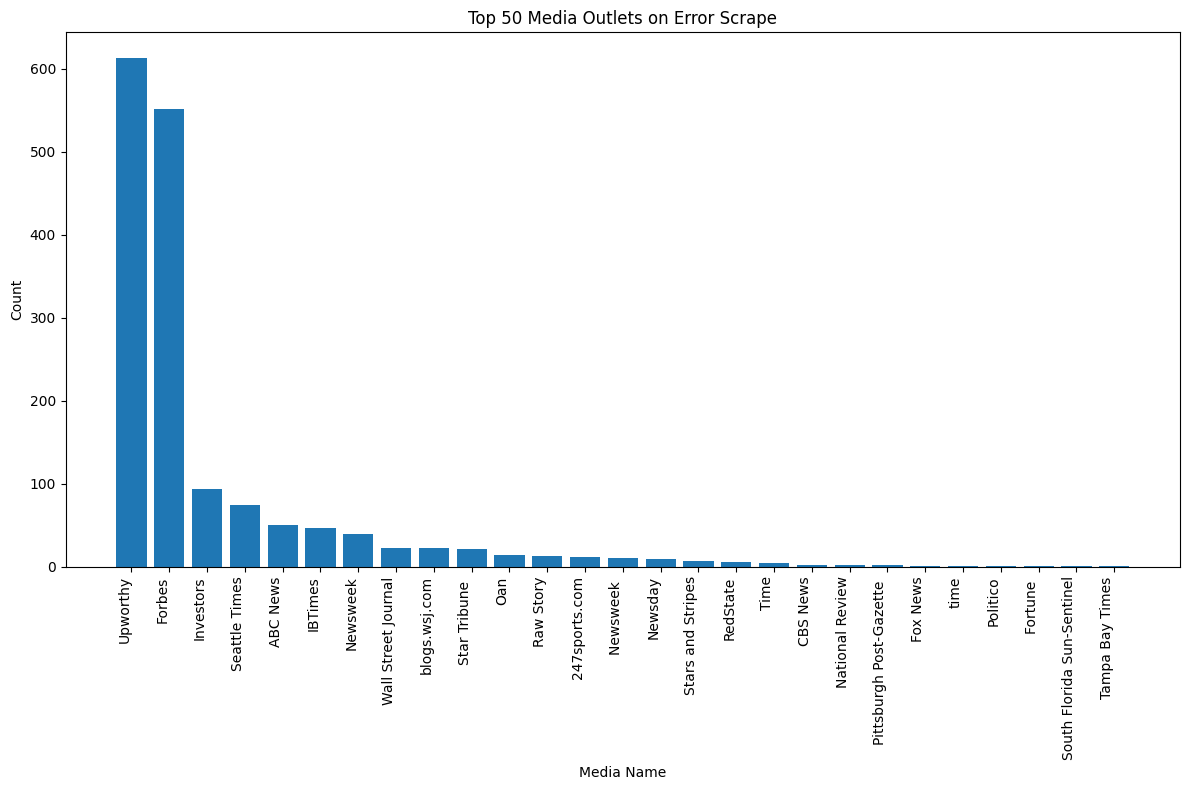

In [44]:
# Get the counts of unique values in the 'media_name' column
value_counts = no_scraped['media_name'].value_counts()

# Select the top 50 values
top_50_values = value_counts.head(50)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart with rotated x-axis labels
plt.bar(top_50_values.index, top_50_values.values)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel('Media Name')
plt.ylabel('Count')
plt.title('Top 50 Media Outlets on Error Scrape')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

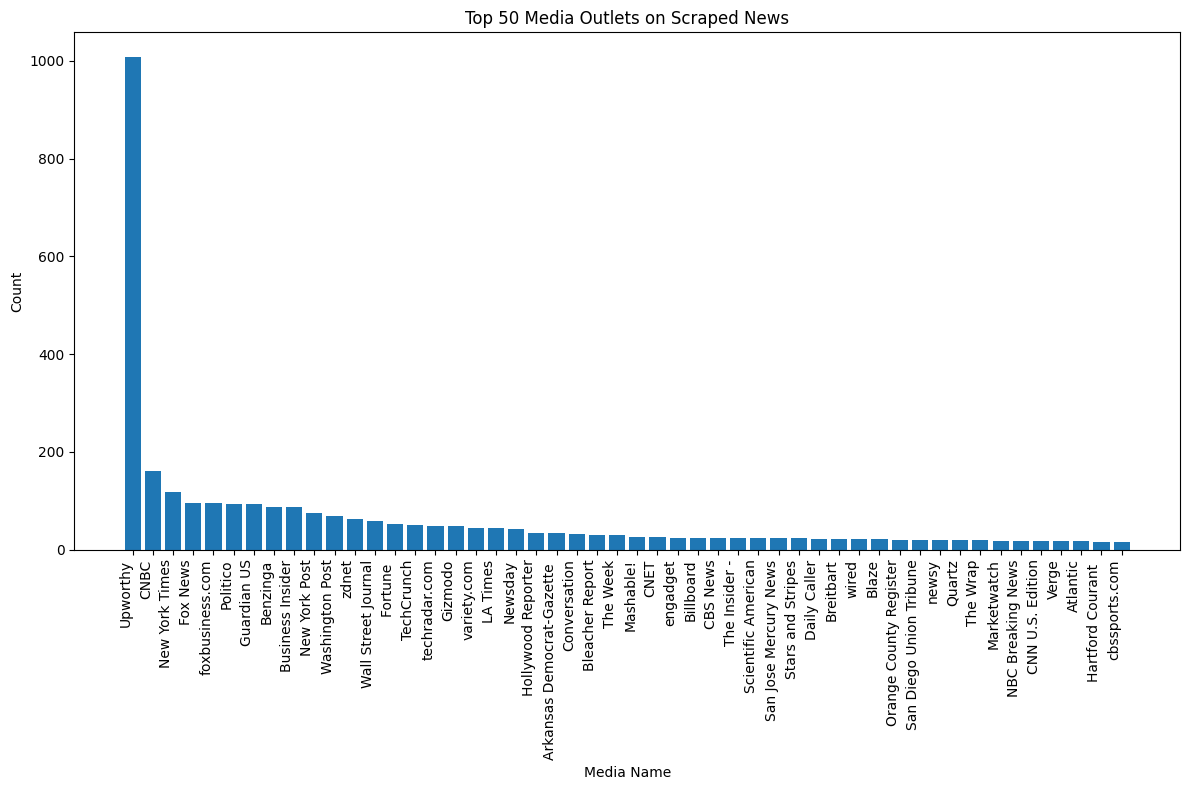

In [45]:
# Get the counts of unique values in the 'media_name' column
value_counts = scraped['media_name'].value_counts()

# Select the top 50 values
top_50_values = value_counts.head(50)

# Set a larger figure size
plt.figure(figsize=(12, 8))

# Plot a bar chart with rotated x-axis labels
plt.bar(top_50_values.index, top_50_values.values)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel('Media Name')
plt.ylabel('Count')
plt.title('Top 50 Media Outlets on Scraped News')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [50]:
# Count occurrences of each unique value in the 'media_url' column
media_url_counts_na = no_scraped['media_name'].value_counts()
media_url_counts_no_na = scraped['media_name'].value_counts()

In [51]:
# Check if media_url values from media_url_counts_na are present in media_url_counts_no_na
common_media_urls = media_url_counts_na.index[media_url_counts_na.index.isin(media_url_counts_no_na.index)]

# Display common media_urls
print("Common Media URLs:")
len(common_media_urls)

Common Media URLs:


15

In [59]:
# Specify the media_url you want to search for
target_media_url = 'Forbes'

# Check if the media_url is in the counts
if target_media_url in media_url_counts_no_na:
    # Retrieve the count for the target media_url
    count_for_target_media_url = media_url_counts_no_na.loc[target_media_url]
    print(f"Count for {target_media_url}: {count_for_target_media_url}")
else:
    print(f"{target_media_url} not found in the counts.")

Forbes not found in the counts.


In [18]:
media_url_counts_na
#media_url_counts_no_na

media_name
Upworthy                      613
Forbes                        551
Investors                      94
Seattle Times                  74
ABC News                       50
IBTimes                        47
Newsweek                       39
Wall Street Journal            23
blogs.wsj.com                  22
Star Tribune                   21
Oan                            14
Raw Story                      13
247sports.com                  11
Newsweek                       10
Newsday                         9
Stars and Stripes               7
RedState                        5
Time                            4
CBS News                        2
National Review                 2
Pittsburgh Post-Gazette         2
time                            1
Fox News                        1
Politico                        1
Fortune                         1
South Florida Sun-Sentinel      1
Tampa Bay Times                 1
Name: count, dtype: int64

In [53]:
no_scraped.columns

Index(['ID', 'URL', 'Body', 'Error', 'media_id', 'media_name', 'media_url',
       'metadata', 'stories_id', 'story_tags', 'title'],
      dtype='object')

In [54]:
no_scraped.loc[no_scraped['media_name'] == 'Forbes', 'URL'].iloc[10]

'https://www.forbes.com/sites/erikofgang/2023/10/16/ai-wont-replace-bartenders-but-its-already-influencing-craft-culture/'

In [57]:
forbes = no_scraped[no_scraped['media_name'] == 'Forbes']

In [58]:
forbes

,ID,URL,Body,Error,media_id,media_name,media_url,metadata,stories_id,story_tags,title
63,2785680763,https://www.forbes.com/sites/renaegregoire/202...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2785680763,[],"AI Showdown, Part 3: ChatGPT, Claude, Bing, An..."
93,2785815226,https://www.forbes.com/sites/mollybohannon/202...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2785815226,[],‘Paw Patrol’ Sequel Leads Weekend Box Office—A...
99,2785833627,https://www.forbes.com/sites/billeehoward/2023...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2785833627,[],Top 4 Insights All C-Suite Leaders + Market Re...
144,2786036381,https://www.forbes.com/sites/robtoews/2023/10/...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2786036381,[],10 Blockbuster AI M&A Deals On The Horizon
231,2798698388,https://www.forbes.com/sites/esmtberlin/2023/1...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2798698388,[],Master Machine Learning In Your Workplace (wit...
...,...,...,...,...,...,...,...,...,...,...,...
10457,2797400283,https://www.forbes.com/sites/digital-assets/20...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2797400283,"[{'stories_id': 2797400283, 'tag': 'geonames_6...",U.S. Dollar ‘Collapse’ Primes Crypto For ‘Tril...
10475,2797515882,https://www.forbes.com/sites/joemckendrick/202...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2797515882,"[{'stories_id': 2797515882, 'tag': 'nyt_labell...",Half Of All Skills Will Be Outdated Within Two...
10493,2797748981,https://www.forbes.com/sites/ewanspence/2023/1...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2797748981,[],The Latest Pixel 8 Pro Problem Is Nothing To W...
10513,2798030679,https://www.forbes.com/sites/renaegregoire/202...,NaN,Article `download()` failed with 403 Client Er...,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",2798030679,[],3 Insider Tactics For Creating Million-Dollar ...


In [61]:
urls

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
0,False,2023-10-01 00:03:07.541731,NaN,https://www.centralmaine.com/?p=3049206&previe...,en,25755,Central Maine News,https://www.centralmaine.com/,"{'date_guess_method': None, 'extractor_version...",3131344363,2023-10-01 00:00:25,2785393041,[],U.S. Senate weighs measure to restrict AI use ...,https://www.centralmaine.com/2023/10/01/u-s-se...,NaN
1,False,2023-10-01 01:37:45.609058,NaN,https://biztoc.com/x/3788c64223fc12c1?ref=ff,en,26357,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131380794,2023-10-01 00:50:06,2785435424,[],Nick Clegg says Meta used public Facebook and ...,https://biztoc.com/x/3788c64223fc12c1?ref=ff,NaN
2,False,2023-10-01 01:37:34.113380,NaN,https://biztoc.com/x/8d4c8ec9efa76c3a?ref=ff,en,26357,Upworthy,http://www.upworthy.com,"{'date_guess_method': None, 'extractor_version...",3131380973,2023-10-01 01:04:14,2785435193,[],AIO might be the new SEO,https://biztoc.com/x/8d4c8ec9efa76c3a?ref=ff,NaN
3,False,2023-10-01 03:15:06.538870,NaN,https://www.arkansasonline.com/news/2023/oct/0...,en,56,Arkansas Democrat-Gazette,http://www2.arkansasonline.com/,"{'date_guess_method': None, 'extractor_version...",3131426245,2023-10-01 02:44:00,2785483965,[],"OTHERS SAY: AI could help, but at what cost?",https://www.arkansasonline.com/news/2023/oct/0...,NaN
4,False,2023-10-01 03:15:03.216127,NaN,https://www.arkansasonline.com/news/2023/oct/0...,en,56,Arkansas Democrat-Gazette,http://www2.arkansasonline.com/,"{'date_guess_method': None, 'extractor_version...",3131426264,2023-10-01 02:55:00,2785483949,[],"The thrill is gone, then returns",https://www.arkansasonline.com/news/2023/oct/0...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5175,False,2023-11-03 01:09:59.750985,NaN,https://arstechnica.com/?p=1980413,en,18351,arstechnica.com,http://arstechnica.com,"{'date_guess_method': None, 'extractor_version...",3158762327,2023-11-01 17:21:46,2816117787,"[{'stories_id': 2816117787, 'tag': 'geonames_2...",“Catastrophic” AI harms among warnings in decl...,https://arstechnica.com/?p=1980413,NaN
5176,False,2023-11-03 02:33:46.701801,NaN,107325811,en,1755,CNBC,http://www.cnbc.com/,"{'date_guess_method': None, 'extractor_version...",3158798491,2023-10-30 19:46:44,2816156060,"[{'stories_id': 2816156060, 'tag': 'geonames_6...",CNBC Daily Open: Markets’ bounce may be short-...,https://www.cnbc.com/2023/10/31/stock-markets-...,NaN
5177,False,2023-11-05 16:01:49.913506,NaN,https://doakio.com/?p=23088,en,18496,Hollywood Reporter,http://www.hollywoodreporter.com,"{'date_guess_method': None, 'extractor_version...",3160696842,2023-11-01 18:00:00,2818282751,"[{'stories_id': 2818282751, 'tag': 'nyt_labell...",Missteps in Blockchain Documentation: A Review,https://doakio.com/blog/missteps-in-blockchain...,NaN
5178,False,2023-11-05 16:01:51.094680,NaN,https://doakio.com/?p=23081,en,18496,Hollywood Reporter,http://www.hollywoodreporter.com,"{'date_guess_method': None, 'extractor_version...",3160696860,2023-10-31 18:00:00,2818282763,"[{'stories_id': 2818282763, 'tag': 'nyt_labell...",Why Jargon Isn’t Always the Enemy: Technical v...,https://doakio.com/blog/why-jargon-isnt-always...,NaN


In [62]:
forbes_urls = urls[urls['media_name'] == 'Forbes']

In [63]:
forbes_urls

,ap_syndicated,collect_date,feeds,guid,language,media_id,media_name,media_url,metadata,processed_stories_id,publish_date,stories_id,story_tags,title,url,word_count
21,False,2023-10-01 09:15:11.534651,NaN,content_65181e88da214f2ce6db3d53,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3131608453,2023-10-01 09:11:00,2785680763,[],"AI Showdown, Part 3: ChatGPT, Claude, Bing, An...",https://www.forbes.com/sites/renaegregoire/202...,NaN
31,False,2023-10-01 12:43:38.315263,NaN,content_65199e2cdb694f20dfbf9301,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3131724007,2023-10-01 12:31:06,2785815226,[],‘Paw Patrol’ Sequel Leads Weekend Box Office—A...,https://www.forbes.com/sites/mollybohannon/202...,NaN
33,False,2023-10-01 13:11:21.789306,NaN,content_6516df105252627bff39758a,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3131739695,2023-10-01 13:00:00,2785833627,[],Top 4 Insights All C-Suite Leaders + Market Re...,https://www.forbes.com/sites/billeehoward/2023...,NaN
48,False,2023-10-01 20:06:21.151211,NaN,content_6514fbbb61363218aabc7996,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3131904579,2023-10-01 19:23:45,2786036381,[],10 Blockbuster AI M&A Deals On The Horizon,https://www.forbes.com/sites/robtoews/2023/10/...,NaN
84,False,2023-10-02 05:46:19.789492,NaN,content_651a8c7b31722308649d667a,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3132168466,2023-10-02 05:31:28,2786326393,[],Freedom On The Net Report Highlights Dangers O...,https://www.forbes.com/sites/emmawoollacott/20...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,False,2023-11-01 13:20:42.474719,NaN,content_65415fd43690ef05bfc2584e,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3157480742,2023-11-01 13:15:00,2814644498,[],12 Smart Ways To Monitor And Manage A Company’...,https://www.forbes.com/sites/forbescommunicati...,NaN
5106,False,2023-11-01 15:19:22.320620,NaN,content_6542a0a4dd59616ef062d55f,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3157567387,2023-11-01 15:06:00,2814742635,"[{'stories_id': 2814742635, 'tag': 'geonames_6...",AMD Shares Jump Over 8% After Optimistic AI Ch...,https://www.forbes.com/sites/antoniopequenoiv/...,NaN
5109,False,2023-11-01 15:48:47.081098,NaN,content_6542a38cf14b015c367c8b8e,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3157586847,2023-11-01 15:42:13,2814765263,"[{'stories_id': 2814765263, 'tag': 'geonames_1...",China’s Demographic Catastrophe,https://www.forbes.com/sites/miltonezrati/2023...,NaN
5133,False,2023-11-01 17:47:18.030689,NaN,content_6542c2d329ae637c954e5add,en,1104,Forbes,http://www.forbes.com/,"{'date_guess_method': None, 'extractor_version...",3157660124,2023-11-01 17:40:09,2814851102,"[{'stories_id': 2814851102, 'tag': 'geonames_6...",InnovationRx: The VA’s Call For AI Tools,https://www.forbes.com/sites/alexknapp/2023/11...,NaN
